In [182]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import query_helper
# import websrcape_wiki_table

# Start by loading db into pandas

In [183]:
df = query_helper.query_to_df('''SELECT * FROM routes''')

In [184]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder",https://www.mountainproject.com/route/105714722/central-yellow-wall,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock",https://www.mountainproject.com/route/105714728/waves,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"South Dakota,Custer State Park,Cathedral Spires,Station 13",https://www.mountainproject.com/route/105714731/east-chimney-variation,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet",https://www.mountainproject.com/route/105714734/conn-diagonal,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo",https://www.mountainproject.com/route/105714737/bolts-for-bobs,-103.469,43.8870


In [185]:
df.shape

(36609, 11)

# Data  Cleaning

### Add sub location cols

In [186]:
df['location']=df['location'].apply(lambda x: x.split(','))

In [187]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"[South Dakota, Custer State Park, Sylvan Lake, Sylvan Lake Bouldering, Campground Boulder]",https://www.mountainproject.com/route/105714722/central-yellow-wall,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"[South Dakota, The Needles Of Rushmore, Mount Rushmore National Memorial, South Seas, Shipyard R...",https://www.mountainproject.com/route/105714728/waves,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"[South Dakota, Custer State Park, Cathedral Spires, Station 13]",https://www.mountainproject.com/route/105714731/east-chimney-variation,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"[South Dakota, Custer State Park, Sylvan Lake, Outlets, Outer Outlet]",https://www.mountainproject.com/route/105714734/conn-diagonal,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"[South Dakota, The Needles Of Rushmore, Mount Rushmore National Memorial, South Seas, Borneo]",https://www.mountainproject.com/route/105714737/bolts-for-bobs,-103.469,43.8870


In [188]:
df['region'] =0
df['area']=0
df['sub_area']=0
df['wall']=0

In [189]:
def split_list(array, length):
    if length ==5:
        if len(array)>=5:
            return ','.join(array[4:])
        else:
            return 0
    if len(array)>= length:
        return array[length-1]
    else:
        return 0
        

In [190]:
#parse area info (note size varies and we only split into 5 sections)
df.region =df.location.apply(lambda x: split_list(x,2))
df.area =df.location.apply(lambda x: split_list(x,3))
df.sub_area =df.location.apply(lambda x:  split_list(x,4))
df.wall =df.location.apply(lambda x:  split_list(x,5))

#then make location state only
df.location = df.location.apply(lambda x: x[0])

In [191]:
#reorder df for readability
df = df[['id',
'name',
'type',
'rating',
'stars',
'starVotes',
'pitches',
'location',
'region',
'area',
'sub_area',
'wall',
'longitude',
'latitude',
'url',
]]
df.head(20)

,id,name,type,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs
5,105714740,Solitaire,Sport,5.7,4.1,120,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714740/solitaire
6,105714743,Star Dancer,"Sport, TR",5.8,4.4,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/105714743/star-dancer
7,105714746,Solo System,"Sport, TR",5.6,3.0,70,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/105714746/solo-system
8,105714749,Weird Water,Trad,5.7,4.8,89,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8824,https://www.mountainproject.com/route/105714749/weird-water
9,105714752,Patience,Sport,5.8 X,3.9,16,1,South Dakota,Custer State Park,Tenpins/Switchbacks,Pawn,0,-103.536,43.8394,https://www.mountainproject.com/route/105714752/patience


### Breakout Climbing type

In [197]:
df.type.value_counts()

Sport                             12993
Boulder                            9809
Trad                               7365
TR                                 1383
Trad, TR                           1346
Trad, Alpine                        772
Sport, TR                           683
Trad, Sport                         562
Trad, Aid                           276
Boulder, Alpine                     211
Ice                                 159
Sport, Alpine                       131
TR, Boulder                          91
Trad, Ice                            67
Aid                                  66
Snow, Alpine                         57
Trad, Mixed, Ice                     47
Trad, Boulder                        42
Sport, Mixed                         39
Trad, Snow, Alpine                   33
Trad, Sport, TR                      32
Trad, Mixed, Ice, Alpine             31
Trad, TR, Alpine                     29
Trad, Ice, Alpine                    25
Ice, Snow, Alpine                    24


In [193]:
df.isna().sum()

id           0
name         0
type         0
rating       0
stars        0
starVotes    0
pitches      0
location     0
region       0
area         0
sub_area     0
wall         0
longitude    0
latitude     0
url          0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36609 entries, 0 to 36608
Data columns (total 15 columns):
id           36609 non-null int64
name         36609 non-null object
type         36609 non-null object
rating       36609 non-null object
stars        36609 non-null float64
starVotes    36609 non-null int64
pitches      36609 non-null int64
location     36609 non-null object
region       36609 non-null object
area         36609 non-null object
sub_area     36609 non-null object
wall         36609 non-null object
longitude    36609 non-null float64
latitude     36609 non-null float64
url          36609 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 4.2+ MB


In [196]:
df.type = df.type.apply(lambda x: 'Trad' if x=='' else x)

In [198]:
df['Sport'] =0
df['Trad']=0
df['Boulder']=0
df['TR']=0
df['Alpine'] =0
df['Aid']=0
df['Ice']=0
df['Snow'] =0
df['Mixed']=0

In [199]:
df['Sport'] =df['type'].apply(lambda x: 1 if 'Sport' in x else 0)
df['Trad']=df['type'].apply(lambda x: 1 if 'Trad' in x else 0)
df['Boulder']=df['type'].apply(lambda x: 1 if 'Boulder' in x else 0)
df['TR']=df['type'].apply(lambda x: 1 if 'TR' in x else 0)
df['Alpine'] =df['type'].apply(lambda x: 1 if 'Alpine' in x else 0)
df['Aid']=df['type'].apply(lambda x: 1 if 'Aid' in x else 0)
df['Ice']=df['type'].apply(lambda x: 1 if 'Ice' in x else 0)
df['Snow'] =df['type'].apply(lambda x: 1 if 'Snow' in x else 0)
df['Mixed']=df['type'].apply(lambda x: 1 if 'Mixed' in x else 0)

In [201]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0


In [202]:
df.drop(columns='type',inplace=True)

### Look at pitches

In [203]:
df.pitches.value_counts()

 1     17043
 0     15807
 2      1473
 3       756
 4       515
 5       308
 6       200
 8       114
 7       110
 9        62
 10       60
 11       34
 12       32
 15       19
 14       11
 16        9
 13        9
 19        5
 17        5
-1         5
 20        4
 22        4
 18        4
 26        3
 30        2
 35        2
 23        2
 21        2
-7         1
 27        1
 36        1
 28        1
-9         1
 29        1
-2         1
 33        1
 31        1
Name: pitches, dtype: int64

In [204]:
pd.options.display.max_colwidth = 100

In [210]:
df[(df.pitches==0) & (df.Boulder==0)]

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed


In [206]:
def pitches_wo_boulders(row):
    if (row['pitches']==0)&(row['Boulder']==0):
        return 1
    else:
        return row['pitches']
    

In [207]:
#change all non boulders with zero to 1 pitch
df.pitches =df.apply(pitches_wo_boulders, axis=1)

In [208]:
# change negative pitch counts to 1
df.pitches =df.pitches.apply(lambda x: 1 if x<0 else x)

In [209]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0


### Clean Difficulity Rating

In [250]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

#### Add danger column

In [246]:
df['danger'] = 'G'



In [251]:
diff_grade['Safety']

['PG13', 'R', 'X']

In [278]:
#parses our difficulty rating and secified substring
def get_grade_sub(string, catagory):
    words = string.split()
    for word in words:
        if word in diff_grade[catagory]:
            return word
    if catagory == "Safety":
        return "G"
    if (catagory == 'Rope') | (catagory == 'Boulder'):
        return 0

In [273]:
df['danger'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Safety'))

In [274]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,R,0,0
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,G,0,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,G,0,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,G,0,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,G,0,0


#### Add diff_rating for Rope and Bouldering 

In [275]:
df['rope_grade'] = 0
df['boulder_grade'] = 0

In [279]:
df['rope_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Rope'))
df['boulder_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Boulder'))

In [280]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,R,0,V3
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,G,5.8,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,G,5.7,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,G,5.7,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,G,5.8,0


In [ ]:
###if i want a grade scale use enumerate through diff_grade dict and assign i

#### Give Ratings Ranges

In [236]:
# diff_grade ={
#     "Rope": "3rd\n4th\nEasy 5th\n5.0\n5.1\n5.2\n5.3\n5.4\n5.5\n5.6\n5.7\n5.7+\n5.8-\n5.8\n5.8+\n5.9-\n5.9\n5.9+\n5.10a\n5.10-\n5.10a/b\n5.10b\n5.10\n5.10b/c\n5.10c\n5.10+\n5.10c/d\n5.10d\n5.11a\n5.11-\n5.11a/b\n5.11b\n5.11\n5.11b/c\n5.11c\n5.11+\n5.11c/d\n5.11d\n5.12a\n5.12-\n5.12a/b\n5.12b\n5.12\n5.12b/c\n5.12c\n5.12+\n5.12c/d\n5.12d\n5.13a\n5.13-\n5.13a/b\n5.13b\n5.13\n5.13b/c\n5.13c\n5.13+\n5.13c/d\n5.13d\n5.14a\n5.14-\n5.14a/b\n5.14b\n5.14\n5.14b/c\n5.14c\n5.14+\n5.14c/d\n5.14d\n5.15a\n5.15-\n5.15a/b\n5.15b\n5.15\n5.15c\n5.15+\n5.15c/d\n5.15d",
#     'Boulder': "V-easy\nV0-\nV0\nV0+\nV0-1\nV1-\nV1\nV1+\nV1-2\nV2-\nV2\nV2+\nV2-3\nV3-\nV3\nV3+\nV3-4\nV4-\nV4\nV4+\nV4-5\nV5-\nV5\nV5+\nV5-6\nV6-\nV6\nV6+\nV6-7\nV7-\nV7\nV7+\nV7-8\nV8-\nV8\nV8+\nV8-9\nV9-\nV9\nV9+\nV9-10\nV10-\nV10\nV10+\nV10-11\nV11-\nV11\nV11+\nV11-12\nV12-\nV12\nV12+\nV12-13\nV13-\nV13\nV13+\nV13-14\nV14-\nV14\nV14+\nV14-15\nV15-\nV15\nV15+\nV15-16\nV16-\nV16\nV16+\nV16-17\nV17-\nV17",
#     'Ice': "WI1\nWI2-\nWI2\nWI2+\nWI2-3\nWI3-\nWI3\nWI3+\nWI3-4\nWI4-\nWI4\nWI4+\nWI4-5\nWI5-\nWI5\nWI5+\nWI5-6\nWI6-\nWI6\nWI6+\nWI6-7\nWI7-\nWI7\nWI7+\nWI7-8\nWI8-\nWI8\nAI1\nAI1-2\nAI2\nAI2-3\nAI3\nAI3-4\nAI4\nAI4-5\nAI5\nAI5-6\nAI6",
#     'Aid': "C0\nA0\nC0+\nA0+\nC0-1\nA0-1\nC1-\nA1-\nC1\nA1\nC1+\nA1+\nC1-2\nA1-2\nC2-\nA2-\nC2\nA2\nC2+\nA2+\nC2-3\nA2-3\nC3-\nA3-\nC3\nA3\nC3+\nA3+\nC3-4\nA3-4\nC4-\nA4-\nC4\nA4\nC4+\nA4+\nC4-5\nA4-5\nC5-\nA5-\nC5\nA5\nC5+\nA5+",
#     'Mixed': "M1\nM1+\nM1-2\nM2-\nM2\nM2+\nM2-3\nM3-\nM3\nM3+\nM3-4\nM4-\nM4\nM4+\nM4-5\nM5-\nM5\nM5+\nM5-6\nM6-\nM6\nM6+\nM6-7\nM7-\nM7\nM7+\nM7-8\nM8-\nM8\nM8+\nM8-9\nM9-\nM9\nM9+\nM9-10\nM10-\nM10\nM10+\nM10-11\nM11-\nM11\nM11+\nM12-\nM12\nM12+\nM13-\nM13\nM13+",
#     'Snow': "Easy Snow\nMod. Snow\nSteep Snow",
#     "Safety": "Good protection\nPG13 - Slightly runout\nR - A fall could be dangerous\nX - A fall could be your last",
#     "Mountaineering": "I\nII\nIII\nIV\nV\nVI"
#   }

In [240]:
# for k,v in diff_grade.items():
# #     print(k,v)
#     diff_grade[k] = v.split('\n')

### Checking out Value counts

In [245]:
df.shape

(36609, 23)

In [282]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,R,0,V3
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,G,5.8,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,G,5.7,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,G,5.7,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,G,5.8,0


In [283]:
df.rope_grade.value_counts()

0          10766
5.9         2362
5.8         1957
5.10a       1719
5.7         1522
5.10b       1311
5.11a       1270
5.10c       1131
5.12a       1015
5.11b        948
5.10d        910
5.6          867
5.9+         781
5.11c        751
5.10         677
5.12b        631
5.11d        588
5.8+         512
5.10+        492
5.12c        442
5.11         441
5.5          373
5.13a        340
5.11+        313
5.12d        305
5.10-        288
5.10a/b      280
5.10b/c      257
5.7+         255
5.4          239
5.9-         238
5.11-        219
5.13b        200
5.11b/c      189
5.12         178
5.11a/b      169
5.10c/d      156
5.8-         142
5.12-        130
5.12a/b      118
5.13c        111
5.3          111
5.11c/d      101
5.12b/c       92
5.12+         91
5.13d         78
4th           59
5.14a         55
5.13a/b       52
5.13-         47
5.12c/d       45
3rd           42
5.13          40
5.2           37
5.1           29
5.0           27
5.13b/c       27
5.13+         20
5.14b         

In [284]:
df.boulder_grade.value_counts()

0         26433
V3         1079
V2         1069
V4          958
V1          898
V0          824
V5          755
V6          568
V7          450
V8          327
V2-3        230
V-easy      229
V3-4        204
V1-2        186
V9          184
V0+         183
V4-5        176
V0-1        155
V0-         149
V5-6        135
V10         130
V2+         125
V1+         121
V6-7         94
V3+          83
V4+          68
V1-          65
V7-8         64
V11          64
V3-          64
V4-          62
V5+          57
V2-          53
V8-9         44
V7+          43
V6+          36
V5-          30
V7-          28
V12          27
V9-10        24
V6-          21
V8-          15
V8+          15
V10-         11
V9-          10
V10+          9
V9+           8
V12-13        8
V11-12        8
V14           7
V10-11        7
V13           3
V14-15        2
V11+          2
V15           2
V12-          2
V13-          1
V16-          1
V17           1
V12+          1
V13-14        1
Name: boulder_grade, dty

In [289]:
df.starVotes.value_counts()[:4].sum()

17747

In [314]:
df.stars.value_counts().sort_index()

0.0     319
1.0      95
1.3       4
1.4       1
1.5      15
1.6       4
1.7       8
1.8       7
1.9       1
2.0    1275
2.1      16
2.2      26
2.3     135
2.4      64
2.5     475
2.6     186
2.7     413
2.8     486
2.9     494
3.0    4925
3.1     773
3.2     720
3.3    1350
3.4    1082
3.5    2156
3.6    1194
3.7    1453
3.8    1306
3.9     985
4.0    6903
4.1     870
4.2     661
4.3    1021
4.4     754
4.5    1277
4.6     631
4.7     691
4.8     641
4.9     419
5.0    2773
Name: stars, dtype: int64

### Looking at Review Counts

In [305]:
pd.DataFrame(df.groupby(['stars','starVotes']).agg({'name' : 'count'}))

name
stars starVotes      
0.0   0           319
1.0   1            85
      2            10
1.3   3             4
1.4   5             1
1.5   2            14
      4             1
1.6   5             2
      7             2
1.7   3             6
      6             1
      17            1
1.8   4             4
      5             1
      6             1
      82            1
1.9   9             1
2.0   1          1020
      2           173
      3            52
      4            12
      5             7
      6             3
      7             1
      8             1
      9             1
      10            1
      13            1
      27            1
      35            1
      36            1
2.1   7             3
      8             1
      9             2
      11            1
      13            1
      14            1
      15            1
      30            1
      31            1
      97            1
      101           1
      107           1
      115           1
2.2   5             6
      6             3
      9             2
      10            2
      17            1
      24            1
...               ...
5.0   3           231
      4           121
      5            79
      6            48
      7            34
      8            29
      9            16
      10           17
      11            8
      12            3
      13            3
      14            3
      15            3
      16            6
      17            2
      18            3
      19            1
      20            4
      21            2
      22            5
      23            7
      24            2
      26            2
      27            4
      28            2
      29            2
      32            1
      33            1
      34            2
      36            2
      37            1
      39            1
      43            2
      44            3
      45            1
      50            2
      53            2
      57            1
      60            1
      63            1
      68            1
      75            1
      87            1
      88            1
      128           1
      154           1
      161           1
      176           1
      184           1
      252           1

[3955 rows x 1 columns]

In [324]:
star_ct_array = df.groupby(['stars','starVotes']).agg({'name' : 'count'}).unstack()

In [325]:
star_ct_array

name                                                          \
starVotes   0       1       2      3      4      5      6     7     8      
stars                                                                      
0.0        319.0     NaN     NaN    NaN    NaN    NaN    NaN   NaN   NaN   
1.0          NaN    85.0    10.0    NaN    NaN    NaN    NaN   NaN   NaN   
1.3          NaN     NaN     NaN    4.0    NaN    NaN    NaN   NaN   NaN   
1.4          NaN     NaN     NaN    NaN    NaN    1.0    NaN   NaN   NaN   
1.5          NaN     NaN    14.0    NaN    1.0    NaN    NaN   NaN   NaN   
1.6          NaN     NaN     NaN    NaN    NaN    2.0    NaN   2.0   NaN   
1.7          NaN     NaN     NaN    6.0    NaN    NaN    1.0   NaN   NaN   
1.8          NaN     NaN     NaN    NaN    4.0    1.0    1.0   NaN   NaN   
1.9          NaN     NaN     NaN    NaN    NaN    NaN    NaN   NaN   NaN   
2.0          NaN  1020.0   173.0   52.0   12.0    7.0    3.0   1.0   1.0   
2.1          NaN     NaN     NaN    NaN    NaN    NaN    NaN   3.0   1.0   
2.2          NaN     NaN     NaN    NaN    NaN    6.0    3.0   NaN   NaN   
2.3          NaN     NaN     NaN   75.0   23.0    NaN    9.0   6.0   1.0   
2.4          NaN     NaN     NaN    NaN    NaN   12.0    NaN   9.0   2.0   
2.5          NaN     NaN   304.0    NaN   53.0    NaN   16.0   NaN   5.0   
2.6          NaN     NaN     NaN    NaN    NaN   28.0    NaN   7.0  14.0   
2.7          NaN     NaN     NaN  131.0    NaN    NaN   17.0  23.0   NaN   
2.8          NaN     NaN     NaN    NaN   60.0   38.0   49.0   NaN  19.0   
2.9          NaN     NaN     NaN    NaN    NaN    NaN    NaN  30.0  43.0   
3.0          NaN  2786.0   803.0  328.0  174.0  107.0   74.0  51.0  34.0   
3.1          NaN     NaN     NaN    NaN    NaN    NaN    NaN  50.0  31.0   
3.2          NaN     NaN     NaN    NaN    NaN   89.0   62.0   NaN   NaN   
3.3          NaN     NaN     NaN  317.0  160.0    NaN   71.0  52.0  18.0   
3.4          NaN     NaN     NaN    NaN    NaN   99.0    NaN  54.0  47.0   
3.5          NaN     NaN   919.0    NaN  208.0    NaN   86.0   NaN  42.0   
3.6          NaN     NaN     NaN    NaN    NaN  119.0    NaN  68.0  47.0   
3.7          NaN     NaN     NaN  378.0    NaN    NaN   87.0  63.0   NaN   
3.8          NaN     NaN     NaN    NaN  187.0  114.0   96.0   NaN  69.0   
3.9          NaN     NaN     NaN    NaN    NaN    NaN    NaN  78.0  50.0   
4.0          NaN  3739.0  1221.0  471.0  238.0  150.0  102.0  65.0  47.0   
4.1          NaN     NaN     NaN    NaN    NaN    NaN    NaN  55.0  35.0   
4.2          NaN     NaN     NaN    NaN    NaN   86.0   69.0   NaN   NaN   
4.3          NaN     NaN     NaN  266.0  139.0    NaN   71.0  48.0  48.0   
4.4          NaN     NaN     NaN    NaN    NaN   97.0    NaN  47.0  31.0   
4.5          NaN     NaN   505.0    NaN  133.0    NaN   53.0   NaN  30.0   
4.6          NaN     NaN     NaN    NaN    NaN   79.0    NaN  29.0  29.0   
4.7          NaN     NaN     NaN  186.0    NaN    NaN   47.0  34.0   NaN   
4.8          NaN     NaN     NaN    NaN  105.0   68.0   50.0   NaN  24.0   
4.9          NaN     NaN     NaN    NaN    NaN    NaN    NaN  33.0  27.0   
5.0          NaN  1561.0   544.0  231.0  121.0   79.0   48.0  34.0  29.0   

                                                                             \
starVotes  9     10    11    12    13    14    15    16    17    18    19     
stars                                                                         
0.0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.6         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.7         NaN   NaN   NaN   Na

In [333]:
star_ct_array.unstack()

      starVotes  stars
name  0          0.0       319.0
                 1.0         NaN
                 1.3         NaN
                 1.4         NaN
                 1.5         NaN
                 1.6         NaN
                 1.7         NaN
                 1.8         NaN
                 1.9         NaN
                 2.0         NaN
                 2.1         NaN
                 2.2         NaN
                 2.3         NaN
                 2.4         NaN
                 2.5         NaN
                 2.6         NaN
                 2.7         NaN
                 2.8         NaN
                 2.9         NaN
                 3.0         NaN
                 3.1         NaN
                 3.2         NaN
                 3.3         NaN
                 3.4         NaN
                 3.5         NaN
                 3.6         NaN
                 3.7         NaN
                 3.8         NaN
                 3.9         NaN
                 4.0

In [334]:
star_ct_array.unstack()[1]

nan

In [337]:
star_ct_array.unstack().describe()

count    3955.000000
mean        9.256384
std        87.234673
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      3739.000000
dtype: float64

In [338]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

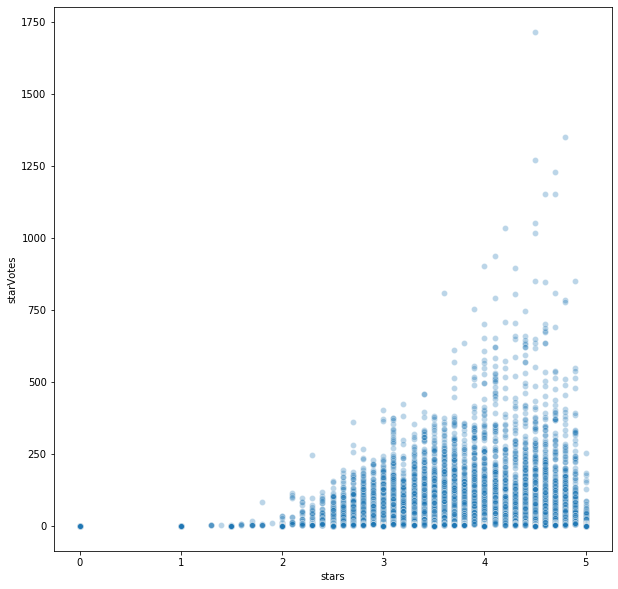

In [340]:
plt.figure(figsize=(10,10))
sns.scatterplot(df.stars,df.starVotes, alpha=.3)

# Write df to csv for ML models

In [341]:
df.to_csv('clean_data.csv')

# General EDA
includes NLP and further cleaned data from models.ipy

### Load feature data for EDA

In [55]:
sns.set(font_scale=2)

In [56]:
df_eda = pd.read_csv('features.csv')
df_eda.drop(columns=['Unnamed: 0'],inplace=True)
df_eda.head()

,stars,pitches,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,slab,traverse,roof,corner,crack,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
0,4.4,0,0,0,1,1,0,0,0,0,0,2,0,15,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.6,2,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4.1,2,0,1,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.9,3,0,1,0,0,0,0,0,0,0,0,11,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.5,1,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df_eda.drop(columns=['stars', 'pitches','rope_grade','boulder_grade'],inplace=True)
df_eda.head()

,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,slab,traverse,roof,corner,crack,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df_eda.columns.values

array(['Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid', 'Ice', 'Snow',
       'Mixed', 'danger', 'slab', 'traverse', 'roof', 'corner', 'crack',
       'face', 'flake', 'fingers', 'jug', 'exposed', 'dihedral',
       'sustained', 'technical', 'run out', 'well protected', 'chimney',
       'offwidth', 'stem', 'arete', 'crimp', 'vertical', 'powerful'],
      dtype=object)

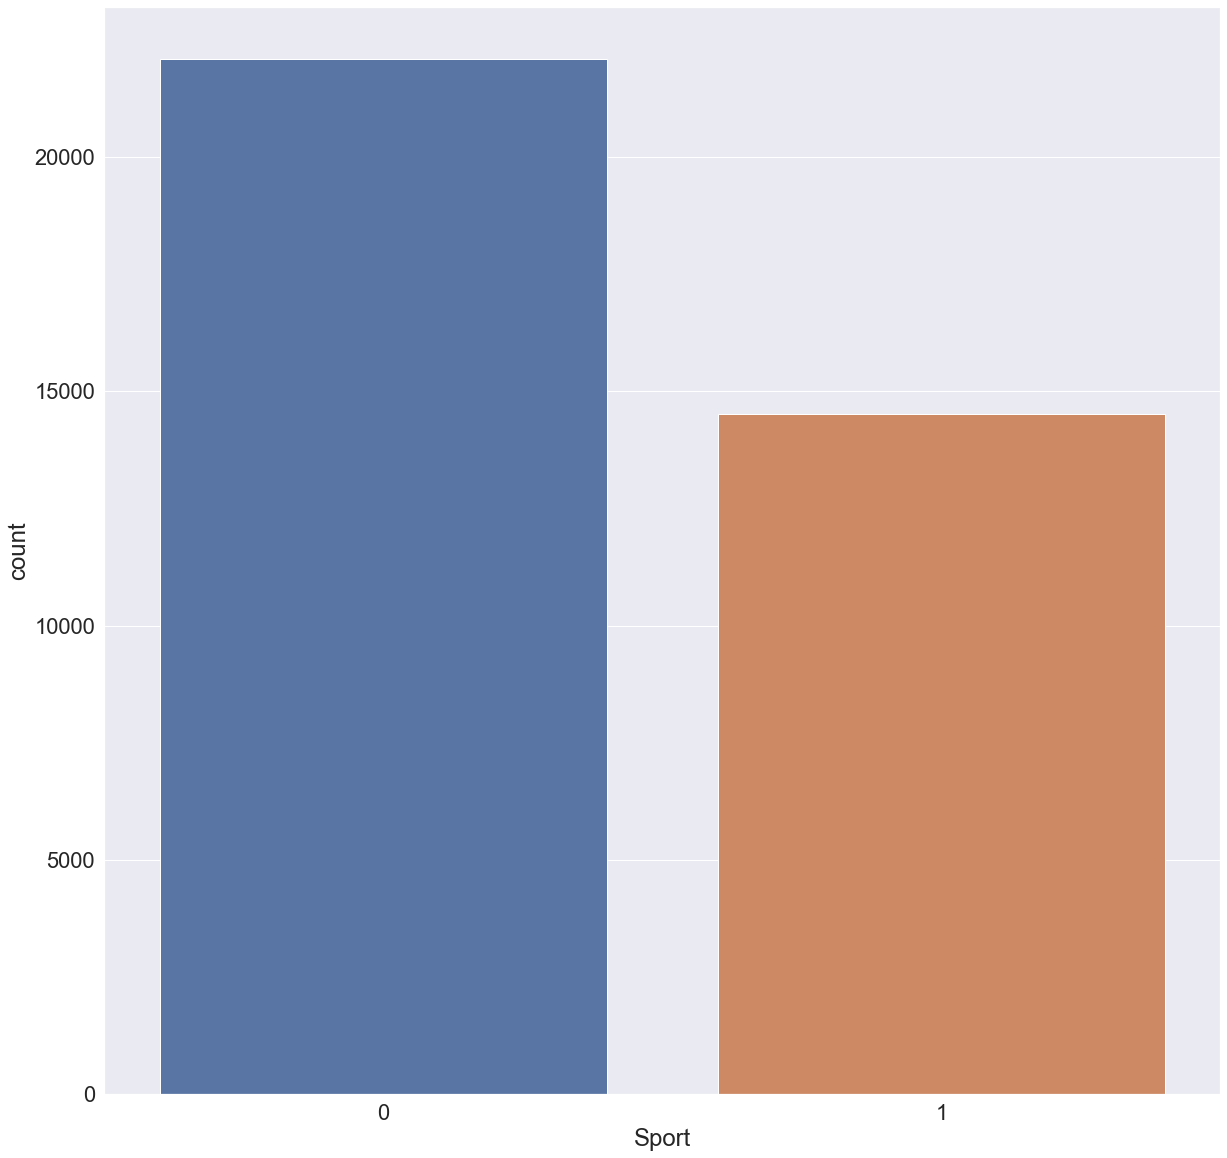

In [59]:
plt.figure(figsize=(20,20))
sns.countplot(df_eda['Sport'])#, 'Trad', 'Boulder', 'TR']])

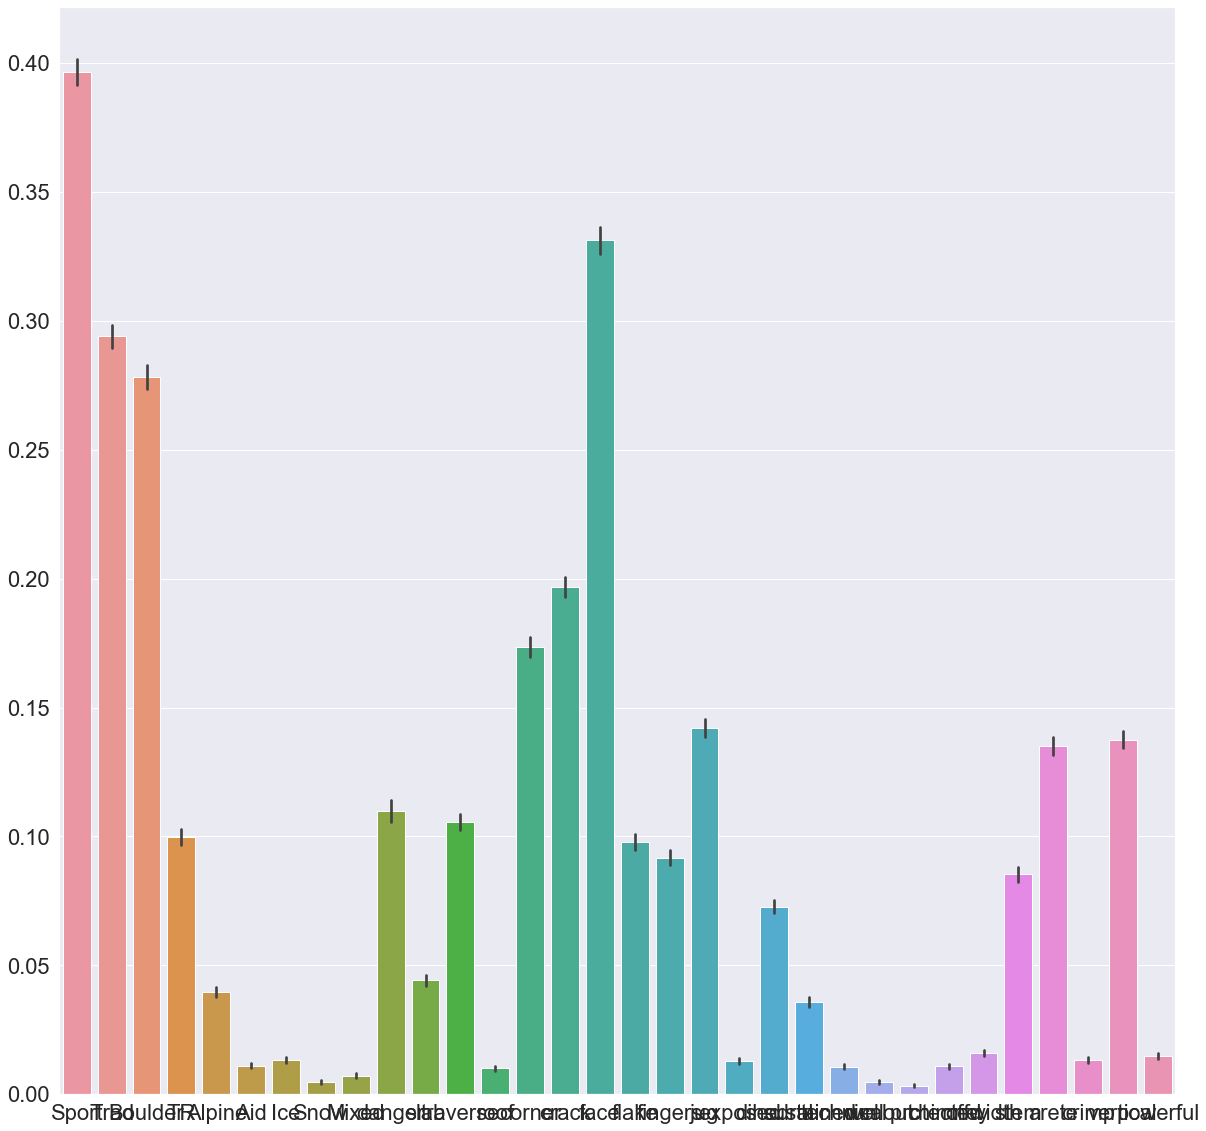

In [60]:
plt.figure(figsize=(20,20))
sns.barplot(data=df_eda)

### Climb Features Distribution

In [61]:
# df_graph = pd.melt(df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']])
df_graph = df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']]

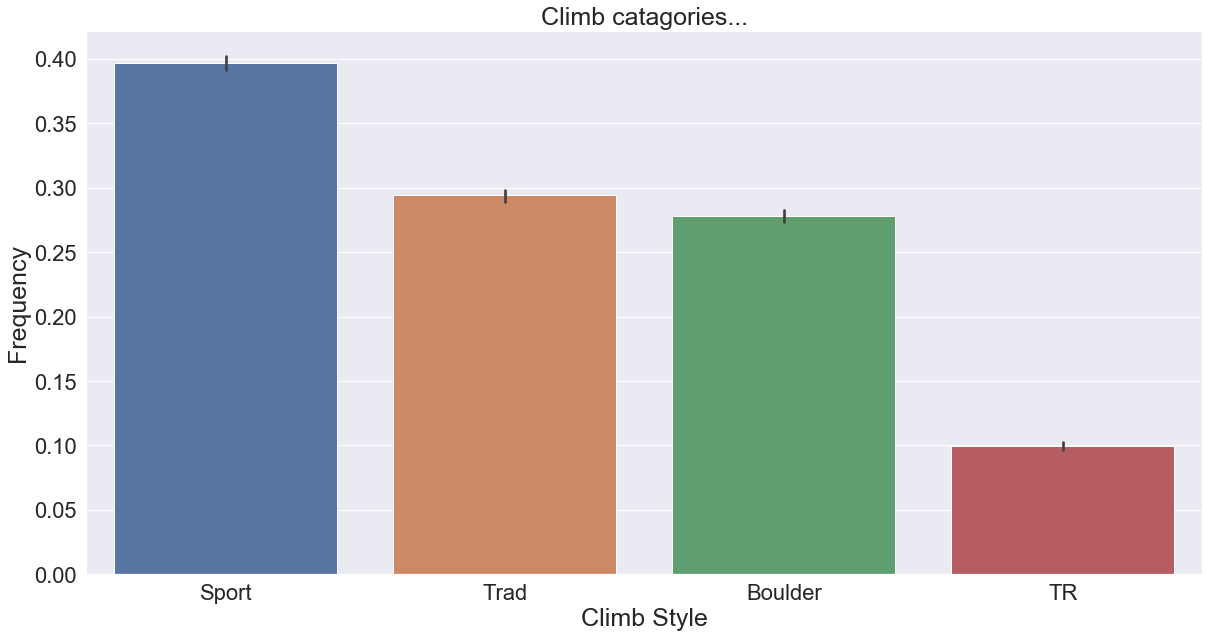

In [62]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df_graph)
plt.title('Climb catagories...',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Frequency',fontsize = 25)
# plt.legend(['No','Yes'])
# plt.set_xlabel(fontsize=20);
plt.savefig('climb_type')

In [63]:
df_graph = pd.melt(df_eda.loc[:,['slab', 'traverse', 'roof', 'corner', 'crack',
       'face', 'flake', 'fingers', 'jug', 'exposed', 'dihedral',
       'sustained', 'technical', 'run out', 'well protected', 'chimney',
       'offwidth', 'stem', 'arete', 'crimp', 'vertical', 'powerful']])

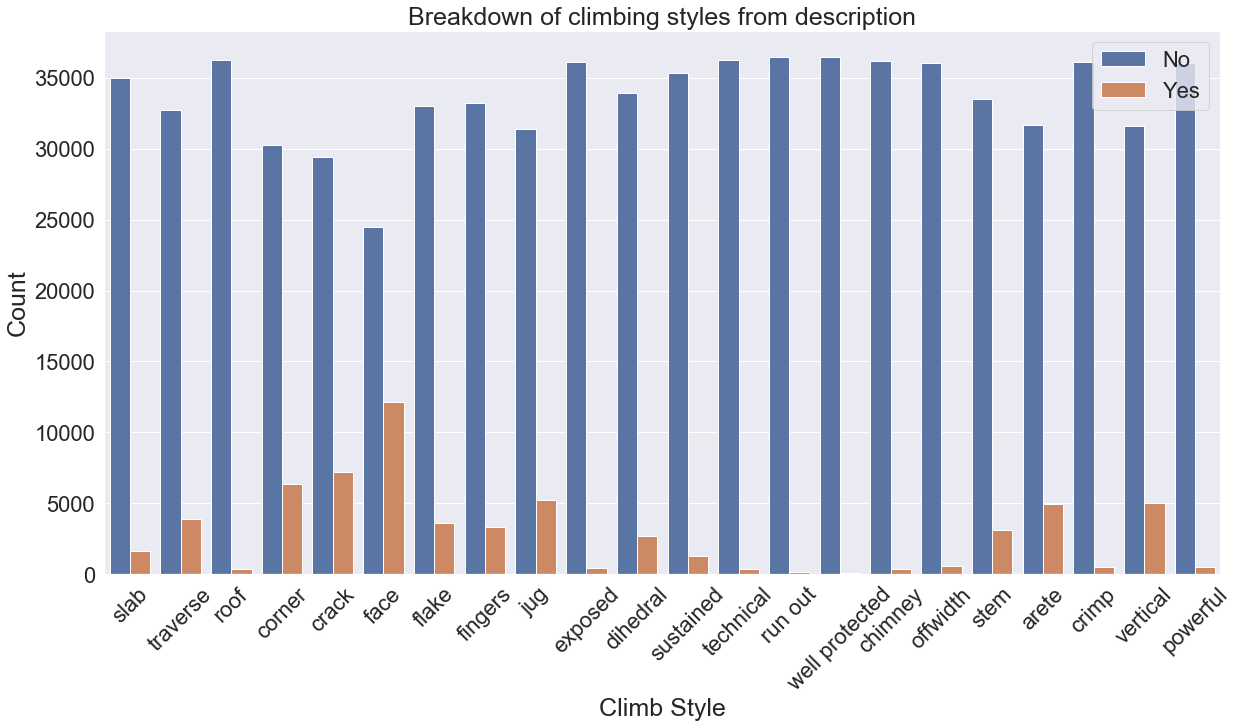

In [64]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="variable", hue="value", data=df_graph)
plt.title('Breakdown of climbing styles from description',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(['No','Yes'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('climb_description_type')

In [65]:
# sns.factorplot(x='variable', y='value', data=df, kind='bar')

In [66]:
df_numeric[df_numeric.rating.isna()]

,orig_index,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,infos,slab,traverse,roof,corner,crack,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful,in_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105750394,1999,Shooting Star,NaN,4.0,16,1,Colorado,Alpine Rock,Indian Peaks,James Peak,0,-105.689,39.8522,https://www.mountainproject.com/route/10575039...,0,1,0,0,1,0,0,0,0,0,0,0,Shooting Star is an excellent mountaineering r...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
105756508,2671,North Face Couloirs,NaN,4.2,13,1,Colorado,Alpine Rock,Tenmile Range,Pacific Peak,0,-106.123,39.4231,https://www.mountainproject.com/route/10575650...,0,1,0,0,1,0,0,0,0,0,0,0,"From the bottom of the north face, locate a co...",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
105756727,2695,Dead Dog Couloir,NaN,3.9,45,1,Colorado,Alpine Rock,Torrey's Peak,0,0,-105.821,39.6428,https://www.mountainproject.com/route/10575672...,0,0,0,0,1,0,0,0,0,0,0,0,Dead Dog is the main couloir on the east face ...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
105756754,2698,North Star Couloir,NaN,4.5,8,1,Colorado,CO Ice & Mixed,Indian Peaks & James Peak Wilderness Areas,Arapahoe Peaks,0,-105.644,40.0238,https://www.mountainproject.com/route/10575675...,0,1,0,0,0,0,0,0,0,0,0,0,This gem of a snow couloir winds its way up th...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
105761478,3099,Audubahn Coulior,NaN,4.0,3,1,Colorado,Alpine Rock,Indian Peaks,Mt. Audubon,0,-105.616,40.0989,https://www.mountainproject.com/route/10576147...,0,1,0,0,1,0,0,0,0,0,0,0,Approach from the north end of Mitchell Lake. ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
105761580,3111,Holy Cross Couloir,NaN,4.1,21,1,Colorado,Alpine Rock,Mount of the Holy Cross,0,0,-106.479,39.4681,https://www.mountainproject.com/route/10576158...,0,0,0,0,1,0,0,0,0,0,0,0,This would be a 3 star rating except it has a ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
df_numeric.describe()

,orig_index,stars,starVotes,pitches,longitude,latitude,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,slab,traverse,roof,corner,crack,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful,in_range
count,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.000000,36609.0
mean,18304.000000,3.688486,25.277527,1.044251,-105.704041,39.141836,0.396596,0.293971,0.278101,0.099620,0.039744,0.011063,0.013385,0.004890,0.007211,0.109754,5.740938,4.311317,0.044197,0.105548,0.010079,0.173482,0.196837,0.331476,0.097927,0.091781,0.142205,0.012838,0.072742,0.035865,0.010653,0.004753,0.003305,0.010899,0.015925,0.085362,0.135021,0.013112,0.137562,0.014887,1.0
std,10568.252339,0.818175,59.027575,1.511342,16.242236,3.858649,0.489198,0.455585,0.448070,0.299497,0.195361,0.104598,0.114917,0.069755,0.084614,0.421213,5.314104,8.666622,0.205535,0.307262,0.099891,0.378669,0.397613,0.470750,0.297220,0.288720,0.349266,0.112578,0.259716,0.185957,0.102664,0.068778,0.057397,0.103829,0.125187,0.279423,0.341751,0.113754,0.344444,0.121103,0.0
min,0.000000,0.000000,0.000000,0.000000,-124.353000,29.968500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9152.000000,3.100000,1.000000,0.000000,-118.571000,36.999200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,18304.000000,3.800000,5.000000,1.000000,-110.720000,38.917400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,27456.000000,4.100000,24.000000,1.000000,-105.118000,41.187500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,36608.000000,5.000000,1715.000000,36.000000,-68.207700,51.341600,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,17.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


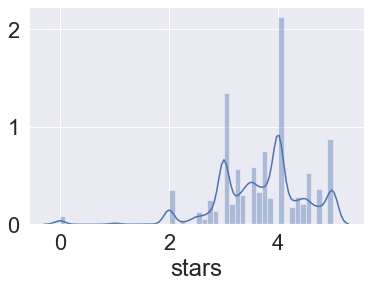

In [68]:
sns.distplot(df_numeric['stars'])

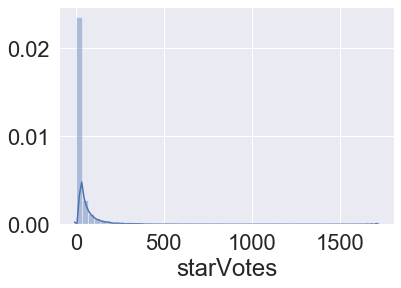

In [69]:
sns.distplot(df_numeric['starVotes'])

In [70]:
df_numeric['pitches'].value_counts()
# plt.xlim(0, 30)     # set the xlim to left, right

1     23017
0      9841
2      1473
3       756
4       515
5       308
6       200
8       114
7       110
9        62
10       60
11       34
12       32
15       19
14       11
13        9
16        9
17        5
19        5
18        4
20        4
22        4
26        3
30        2
35        2
23        2
21        2
36        1
27        1
28        1
33        1
29        1
31        1
Name: pitches, dtype: int64

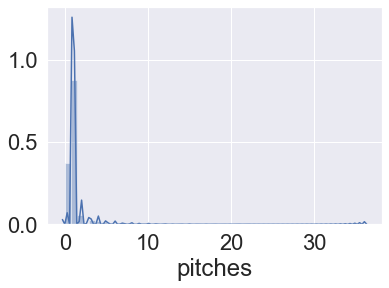

In [71]:
sns.distplot(df_numeric['pitches'])

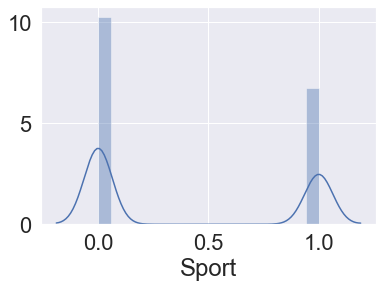

In [72]:
sns.distplot(df_numeric['Sport'])

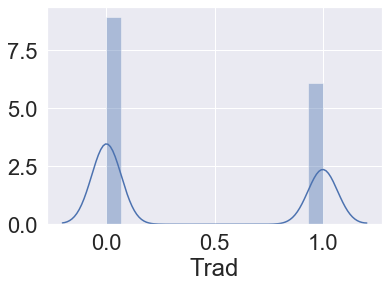

In [73]:
sns.distplot(df_numeric.loc[df_numeric['Boulder']==0,'Trad'])

In [74]:
df_numeric.loc[(df_numeric['Boulder']==0),'name'].count()

26428

In [75]:
df_numeric.loc[(df_numeric['Sport']==1)&(df_numeric['Trad']==1),'name'].count()

622

In [76]:
df_numeric.danger.value_counts()

0    33901
1     1547
2     1012
3      149
Name: danger, dtype: int64

In [78]:
# fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(20,60))
# fig.suptitle('Graphs of Route Descriptions')

# list_of_subplots = np.ravel(axes)

# for ax,col_name in zip(list_of_subplots,features.columns):
#     ax.hist(features[col_name])
#     ax.set_title(f'{col_name} freq')
# fig.savefig('freq_graphs')    #saves fig in current folder

content on modeling notebook